## Building a Natural Language Processing (NLP) Model that Rates the Sentiment of Tweets about Apple and Google Products as Positive, Negative or Neutral.

+ **Student:** Wambui Munene
+ **Student pace:** DSPT08
+ **Scheduled project review date/time:** 12/02/2025 23.59 Hours
+ **Instructor name:** Samuel Karu

## Project Summary

### Business and Data Understanding

The objective of this project is to build a Natural Language Processing (NLP) model that rates the sentiment of tweets about Apple and Google products as positive, negative or neutral. The dataset used to build the model is sourced from CrowdFlower via data.world https://data.world/crowdflower/brands-and-product-emotions. This dataset consists of slightly over 9,000 human-rated tweets.

Sentiment Analysis is a powerful tool that provides businesses with deep insights into public perception of their products and services. By leveraging sentiment analysis, companies can effectively gauge customer sentiment and understand the emotional tone behind customer interactions. This enables businesses to identify  areas of concern in real-time, allowing them to proactively address customer needs and improve their offerings.

Social media is a dynamic and widespread platform where customers freely express their thoughts and feelings about products, services, and brands.Using social media platforms like X (formerly twitter) to gauge sentiments is immensely valuable for businesses as it provides real-time and unfiltered insights into customer opinions and experiences. 

By analyzing these sentiments, companies can tap into a wealth of authentic feedback that traditional surveys or feedback forms might miss. This immediate access to customer sentiment enables businesses to swiftly identify trends, preferences, and potential issues, allowing for proactive engagement and timely adjustments to strategies.

Additionally, sentiment analysis can be useful in understanding the broader market landscape, and how competitors are faring and tailor products to match or exceed market expectations.

### 1. Data Preparation
Data preparation involved the following key steps that are critical for preparing text data for modeling:-
1. **Dataset Loading and Cleaning:**
- Loaded the dataset
- Renamed column names and labels for better readability
- Dealt with missing values

2. **Data Splitting:**
 - Split the data into training, validation and test sets. The training set was set at 70% of the data while the validation and test sets will be 15% respectively. 
 - The validation set was used to tune the hyperparameters and choose the best model configuration without overfitting the test data.
 
3. **Text Transformation:** 
- Used Regular Expressions (REGEX) to remove irrelevant information such as URLs,mentions(@) and hastags(#).
- Converted all text to lowercase to ensure uniformity
- Applied lemmatization to reduce words to their base forms for consistent analysis and reducing complexity
- Removed stop words (common words that typically do not carry significant meaning such as "the," "is," "in," "and," etc.). This helped in focusing on more meaningful words in the text, leading to better performance of NLP models.
- Tokenize the cleaned text

4. **Vectorization of Text Data:**
- Transformed the cleaned text data into numerical representation (vectors) using Term Frequency-Inverse Document Frequency(TF-IDF). This technique evaluates the importance of a word in a document relative to a corpus.
- Adjusted the ngram-range paramemter in the TF-IDF vectorizer to include both unigram(single words) bigram(pair of executive words) to capture context, enriching the feature set and enhancing the model performance.


5. **Exploratory Data Analysis (EDA):**
 - Analyzed the distribution of sentiment labels (positive, negative,neutral) using bar charts and value counts to understand class balance.
 - Visualized the top 10 most common words in the data set.
 - Created word clouds for positive, negative and neutral tweets to visualize most common words in each sentimenclass
 - Visualized bigrams using bar charts to identify common word pairs in the data set, and for each sentiment class
 
 
 
 

In [1]:
# A list of libraries used in the Data Preparation Process: 

# Regular Expressions (re): For cleaning text data
import re 

# NLTK (Natural Language Toolkit): For tokenization, stop words removal, and lemmatization.
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Scikit-learn: For TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer


# Pandas, Matplotlib and Seaborn for data manipulation and analysis and visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# WordCloud: For generating word clouds.
from wordcloud import WordCloud


### 2. Modeling
The project utilized a combination of baseline models and advanced neural networks on the cleaned and vectorized data.

- Created pipelines to streamline data preprocessing (Normalizethe TF-IDF vectors using StandardScaler from Scikit-learn to ensure fair comparisons accross different features),model training and evaluation.This ensured a reproducible and efficient workflow, and minimized the risk of data leakage.
- Initial models included Logistic Regression and Naive Bayes. These models were tuned using GridSearchCV, to find the best hyperparameters, and incorporated cross-validation to prevent overfitting. The optimal hyperparameters were then used on the validation set to fine-tune model performance.
- For advanced modeling, Convolutional Neural Networks (CNNs) were implemented to capture local patterns within the text data. - - The accuracy of the CNN model were compared to those of the baseline models to evaluate their performance improvements.
- After identifying the best-performing model, it was evaluated on the test set to provide an unbiased assessment of its generalization capability. The final test confirmed the model's robustness and accuracy in predicting sentiment on unseen data.



In [2]:
# Scikit-learn for normalization.
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#Scikit-learn for creating pipelines, training models, hyperparameter tuning, and evaluation.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# TensorFlow/Keras for building and training Convolutional Neural Networks (CNNs).
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding



### 3. Evaluation 
The model's performance was evaluated using the following metrics:

- Accuracy: This metric was used to measure the overall correctness of the model's predictions. It represents the proportion of correct predictions out of the total number of predictions.

- Confusion Matrix: This matrix was be used to provide a detailed breakdown of the model's performance by showing the counts of true positive, true negative, false positive, and false negative predictions. It helped to identify the types of errors the models were making and provided insights into its classification accuracy.

In [3]:
# Scikit-learn for calculating accuracy and generating the confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

### 1.1 Load and Clean the Dataset


In [4]:
# Import the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


In [5]:
# Load the data as a DataFrame and display the first 10 columns
df = pd.read_csv('tweet_product_company.csv', encoding='ISO-8859-1')
df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


This data set consists of tweets mainly focussed on apple and google products showing positive, negative or neutral emotions

In [6]:
# check the shape of the data
df.shape
print(f"This data set consists of {df.shape[0]} rows")
print(f"This data set consists of {df.shape[1]} columns")

This data set consists of 9093 rows
This data set consists of 3 columns


In [7]:
# Get column names
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

The three columns are of the object data type; the names of the columns are rather wordy, so I will rename the column names to more user-friendly names.

In [8]:
# Rename column names
df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
}, inplace=True)

df.head()

,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


The column names have been successfully renamed

In [9]:
# Get column attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


There are significant null values under the product column accounting to more than 60% of the data set. I will first try to fill this column with either Apple or Google if the tweet contains the word iphone, ipad or google. Then fill all the remaining NAN values with 'unknown'.

In [10]:
# Get value counts to see the distribution of products
df['product'].value_counts()

product
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

The product distribution seems quite repetitive. All google products will be labelled Google while all Apple products(ipads/iphone) will be labelled Apple.

In [11]:
# Define a function to categorize products
def categorize_product(tweet):
    if pd.isnull(tweet):
        return 'unknown'
    tweet = tweet.lower()
    if 'iphone' in tweet or 'ipad' in tweet or 'apple' in tweet:
        return 'Apple'
    elif 'google' in tweet or 'android' in tweet:
        return 'Google'
    else:
        return 'unknown'

# Apply the function to the 'tweet' column and fill the 'product' column
df['product'] = df['tweet'].apply(categorize_product)

# Verify the changes
df.head()


,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Apple,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [12]:
 df['product'].value_counts()

product
Apple      5525
Google     2781
unknown     787
Name: count, dtype: int64

This has immensely improved the product labeling. I will drop the unknown rows as they consist of less than 10% of the dataset.

In [13]:
# Drop rows where the product is labeled 'unknown'
df = df[df['product'] != 'unknown']

# Verify the changes
df['product'].value_counts()


product
Apple     5525
Google    2781
Name: count, dtype: int64

The rows with unknown have been dropped. I will then check if there are any missing values.

In [14]:
# Check for missing values in the DataFrame
df.isnull().sum()

tweet        0
product      0
sentiment    0
dtype: int64

There are now no missing values in the dataset. 


In [15]:
# check the value counts for the sentiment column
df['sentiment'].value_counts()

sentiment
No emotion toward brand or product    4647
Positive emotion                      2940
Negative emotion                       569
I can't tell                           150
Name: count, dtype: int64

There are 4 labels in the sentiment column. The sentiment wordings are quite wordy, so I will change the wordings to Positive, Negative and Neutral and drop the rows where the sentiment is 'I can't tell'

In [16]:
# Replace sentiments
df['sentiment'] = df['sentiment'].replace({
    'No emotion toward brand or product': 'Neutral',
    'Positive emotion': 'Positive',
    'Negative emotion': 'Negative'
})

# Drop rows where sentiment is 'I can't tell'
df = df[df['sentiment'] != "I can't tell"]

# Verify the changes
print(df['sentiment'].value_counts())

print()

print(df.head())


sentiment
Neutral     4647
Positive    2940
Negative     569
Name: count, dtype: int64

                                               tweet product sentiment
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   Apple  Negative
1  @jessedee Know about @fludapp ? Awesome iPad/i...   Apple  Positive
2  @swonderlin Can not wait for #iPad 2 also. The...   Apple  Positive
3  @sxsw I hope this year's festival isn't as cra...   Apple  Negative
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...  Google  Positive


The 'I can't tell' label has been dropped.The tweets are mostly neutral and positive with very few negative tweets, indicative of satisfaction with the products


### 1.2 Data Splitting 
The data will be will split into the training, validation and test sets. The splits are 70% for training, 15% for validation, and 15% for testing. the validation set will be used to tune the hyperparameters and choose the best model configuration without overfitting the test data.

In [17]:
# Import the relevant library from scikit-learn to split the data
from sklearn.model_selection import train_test_split

# DeFine the features and target
X = df['tweet']
y = df['sentiment']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shape of the datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5709,)
X_val shape: (1223,)
X_test shape: (1224,)
y_train shape: (5709,)
y_val shape: (1223,)
y_test shape: (1224,)


### 1.3 Text Transformations
In this section, we will start the process of preparing the feature column (tweet) for vectorization. This will involve:
- removing unnessary text and symbols like URLs, mentions (@),hashtags(#),links,numbers,punctuation and symbols
- convert all text to lowercase to ensure uniformity
- apply lemmatization to reduce words to their base forms for consistent analysis and reducing complexity
- remove stop words (common words that typically do not carry significant meaning such as "the," "is," "in," "and," etc.). 
- tokenize the cleaned text into individual words

In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define a function for text preprocessing
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#', '', text)
    # Remove [video] and {link}
    text = re.sub(r'\[.*?\]|\{.*?\}', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation and symbols
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove the word 'rt'
    text = re.sub(r'\brt\b', '', text)
    # Lemmatize text
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


# Apply the preprocessing function to the text data
X_train_preprocessed = X_train.apply(preprocess_text)
X_val_preprocessed = X_val.apply(preprocess_text)
X_test_preprocessed = X_test.apply(preprocess_text)

# Verify the changes
print("Training Set:")
print(X_train_preprocessed.head())
print("\nValidation Set:")
print(X_val_preprocessed.head())
print("\nTest Set:")
print(X_test_preprocessed.head())



Training Set:
6360    new iphone autocorrect already tried change qu...
904     compiling sxsw list one google doc taking lot ...
2285    read google circle rumor today sxsw thought le...
5491    going check apple popup shop sxsw sxswi let u ...
520     frankenstein amalgamation fragmented digital i...
Name: tweet, dtype: object

Validation Set:
7378    sxsw photography iphone many live photo amp vi...
5617    checkins fun need extend beyond fun make check...
3256    get tattoo free ipad heard mini cooper would l...
2300    buy ipad makeshift sxsw apple store launch day...
2443    google bing sitting panel dont look like want ...
Name: tweet, dtype: object

Test Set:
1617         got new iphone app dialy grape sxsw thankyou
3961    started using android app totally killer servi...
2114    google quash circle rumour launching product s...
6747                                       ipad take sxsw
698     pic ipadwinning performance sxsw accordion too...
Name: tweet, dtype: object


The feature column has now been transformed into lowercase strings without numbers and symbols. The next step is to tokenize the cleaned text.

In [19]:
from nltk.tokenize import word_tokenize

# Create DataFrames to store the data
train_df = pd.DataFrame({'tweet': X_train_preprocessed})
val_df = pd.DataFrame({'tweet': X_val_preprocessed})
test_df = pd.DataFrame({'tweet': X_test_preprocessed})

# Define a function for tokenization
def tokenize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    return tokens

# Step 2: Create a new column for the tokenized text
train_df['tweet_tokenized'] = train_df['tweet'].apply(tokenize_text)
val_df['tweet_tokenized'] = val_df['tweet'].apply(tokenize_text)
test_df['tweet_tokenized'] = test_df['tweet'].apply(tokenize_text)

# Display the first 5 rows of each set
print("Training Set - First 5 Rows:")
print(train_df.head())
print("\nValidation Set - First 5 Rows:")
print(val_df.head())
print("\nTest Set - First 5 Rows:")
print(test_df.head())

# Check the shapes of the DataFrames
print("\nTraining Set Shape:", train_df.shape)
print("Validation Set Shape:", val_df.shape)
print("Test Set Shape:", test_df.shape)

Training Set - First 5 Rows:
                                                  tweet  \
6360  new iphone autocorrect already tried change qu...   
904   compiling sxsw list one google doc taking lot ...   
2285  read google circle rumor today sxsw thought le...   
5491  going check apple popup shop sxsw sxswi let u ...   
520   frankenstein amalgamation fragmented digital i...   

                                        tweet_tokenized  
6360  [new, iphone, autocorrect, already, tried, cha...  
904   [compiling, sxsw, list, one, google, doc, taki...  
2285  [read, google, circle, rumor, today, sxsw, tho...  
5491  [going, check, apple, popup, shop, sxsw, sxswi...  
520   [frankenstein, amalgamation, fragmented, digit...  

Validation Set - First 5 Rows:
                                                  tweet  \
7378  sxsw photography iphone many live photo amp vi...   
5617  checkins fun need extend beyond fun make check...   
3256  get tattoo free ipad heard mini cooper would l...   


The tweets are now tokenized into individual words and a dataframe created with two columns - the preprocessed tweets and the tokenized tweets. The next step is to perform Exploratory Data Analysis (EDA) before vectorization

### 1.4 Exploratory Data Analysis (EDA) 
In this section I will: 

- Analyze Sentiment Distribution: Use bar charts and value counts to understand the class balance of sentiment labels (positive, negative, neutral). This helps identify any class imbalances.

- Visualize Top Common Words: Identify and display the top 10 most common words in the dataset. This gives an overview of the predominant terms.

- Create Word Clouds: Generate word clouds for positive, negative, and neutral tweets to visualize the most common words in each sentiment class. This provides a visual representation of word frequency and sentiment-specific terms.

- Visualize Bigrams: Use bar charts to identify and display common word pairs (bigrams) in the dataset, and for each sentiment class. This reveals frequently occurring word combinations and their sentiment context.

To perform EDA I will combine the train_df and the y_train (sentiments) into a single data frame. However I will use a copy   of the train_df to avoid modifying the original DataFrame

In [20]:
# Confirm that the number of rows are the same
print(y_train.shape)
print(train_df.shape)

(5709,)
(5709, 2)


In [21]:
# Combine train_df and y_train
train_eda_df = train_df.copy()
train_eda_df['target'] = y_train.values

# Display the first few rows of the combined DataFrame
train_eda_df.head()



,tweet,tweet_tokenized,target
6360,new iphone autocorrect already tried change qu...,"[new, iphone, autocorrect, already, tried, cha...",Negative
904,compiling sxsw list one google doc taking lot ...,"[compiling, sxsw, list, one, google, doc, taki...",Negative
2285,read google circle rumor today sxsw thought le...,"[read, google, circle, rumor, today, sxsw, tho...",Neutral
5491,going check apple popup shop sxsw sxswi let u ...,"[going, check, apple, popup, shop, sxsw, sxswi...",Neutral
520,frankenstein amalgamation fragmented digital i...,"[frankenstein, amalgamation, fragmented, digit...",Neutral


In [22]:
train_eda_df.shape

(5709, 3)

In [23]:
train_eda_df['target'].value_counts()

target
Neutral     3290
Positive    2035
Negative     384
Name: count, dtype: int64

#### 1.4.1 Analyze Sentiment Distribution

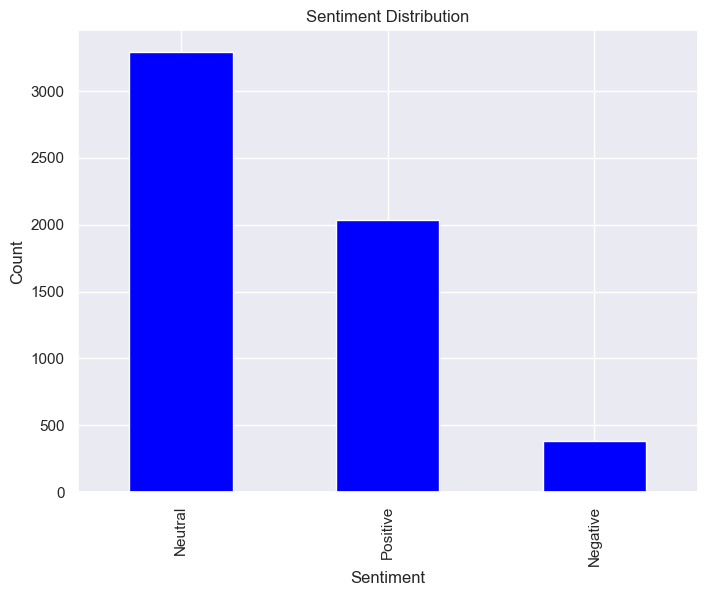

In [24]:
import matplotlib.pyplot as plt

# Count the sentiment labels
sentiment_counts = train_eda_df['target'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='blue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


The tweets are mostly neutral and positive with very few negative tweets, indicative of satisfaction with the products

#### 1.4.2 Visualize Top Common Words

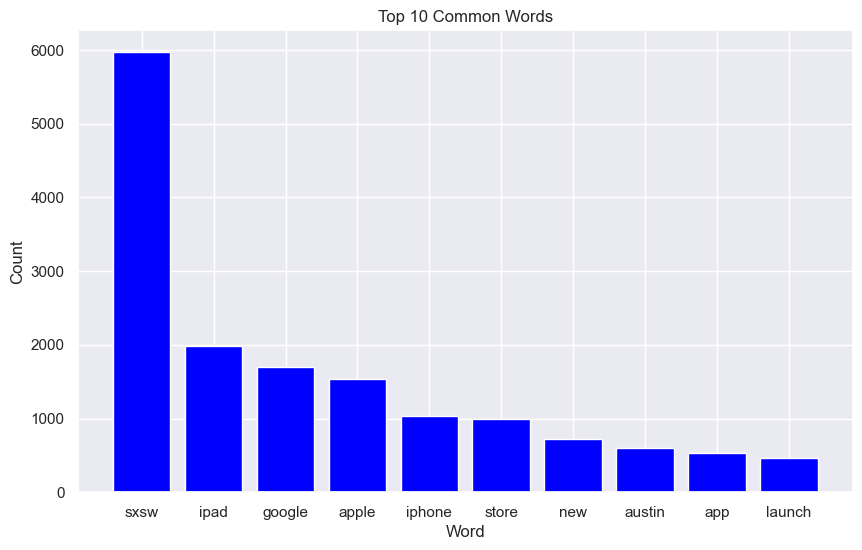

In [25]:
from collections import Counter

# Tokenize the cleaned text data
all_words = ' '.join(train_eda_df['tweet']).split()

# Get the top 10 common words
common_words = Counter(all_words).most_common(10)

# Create a DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot the top common words
plt.figure(figsize=(10, 6))
plt.bar(common_words_df['Word'], common_words_df['Count'], color='blue')
plt.title('Top 10 Common Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()


As is to be expected because the tweets are about Apple and Google products, the top words include ipad, apple, iphone, meaning these words are common among tweets. The use of TF-IDF vectorization will put less weight on these words during modeling. However, I will visualize the top 10 words again excluding those common words. I will also exclude sxsw which is a reference to a conference founded in 1987 in Austin, Texas. SXSW® is best known for its conference and festivals that celebrate the convergence of tech, film, music, education, and culture.I will also exclude austin.

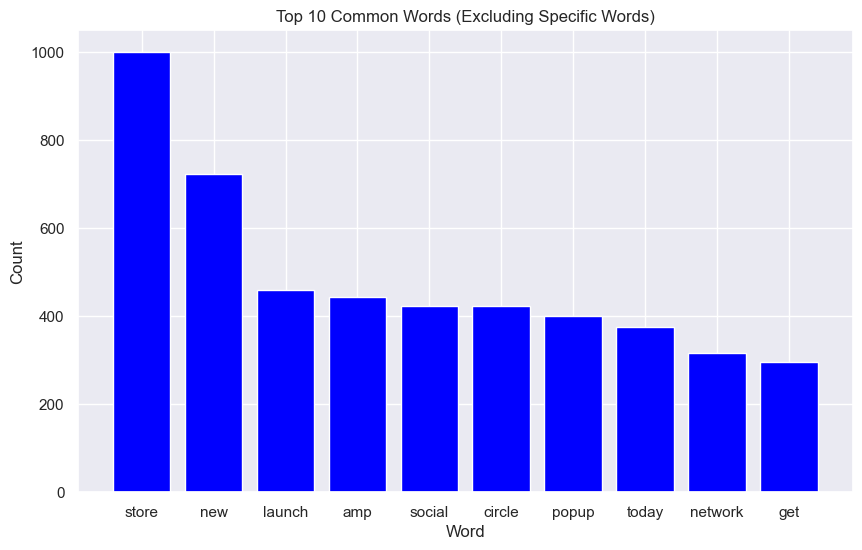

In [29]:

# List of words to exclude
exclude_words = {'ipad', 'google', 'apple', 'iphone', 'app','android','sxsw','austin'}

# Tokenize the cleaned text data
all_words = ' '.join(train_eda_df['tweet']).split()

# Remove the exclude words from the tokenized list
filtered_words = [word for word in all_words if word not in exclude_words]

# Get the top 10 common words
common_words = Counter(filtered_words).most_common(10)

# Create a DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot the top common words excluding specified words
plt.figure(figsize=(10, 6))
plt.bar(common_words_df['Word'], common_words_df['Count'], color='blue')
plt.title('Top 10 Common Words (Excluding Specific Words)')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()


### 1.5 Text Data Vectorization
I will use Term Frequency=Inverse Document Frequency (TF-IDF) to transform text data into numerical features, capturing the importance of words and their combinations as unigrams(single words) and bigrams(pairs of consecutiver words).
Using TF-IDF is important because it effectively weighs the significance of words in a document relative to the entire dataset, helping to distinguish relevant terms from common ones. Incorporating bigrams as features captures contextual information by considering pairs of consecutive words, enhancing the model's ability to understand and analyze the relationships between words in the text.

In [26]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Function to join the list of tokens back into a single string
# def join_tokens(tokens):
#     return ' '.join(tokens)

# # Join tokens for each preprocessed set
# X_train_joined = X_train_tokenized.apply(join_tokens)
# X_val_joined = X_val_tokenized.apply(join_tokens)
# X_test_joined = X_test_tokenized.apply(join_tokens)

# # TF-IDF Vectorization for unigrams and bigrams
# tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# # Apply TF-IDF to the joined tokenized text
# train_tfidf = tfidf_vectorizer.fit_transform(X_train_joined)
# val_tfidf = tfidf_vectorizer.transform(X_val_joined)
# test_tfidf = tfidf_vectorizer.transform(X_test_joined)

# # Verify the shape of the transformed data
# print("Training set shape:", train_tfidf.shape)
# print("Validation set shape:", val_tfidf.shape)
# print("Testing set shape:", test_tfidf.shape)

# # print()  

# # # Display the first few rows of the dense arrays
# print("Training set:", train_tfidf.toarray()[:5])
# print("Validation set:", val_tfidf.toarray()[:5])
# print("Testing set:", test_tfidf.toarray()[:5])



As expected, the features are quite large because of the inclusion of bigrams. Each row corresponds to a document (a tweet), and each column represents a unique term (word or n-gram) from the entire corpus.

The fact that the matrices are sparse (i.e., having many zeros) is expected and typical for TF-IDF representations, especially when using n-grams. Sparse matrices are well-suited for the machine learning models that I plan to use.

I intend to use Principal Component Analysis (PCA), a method that converts the original features into a new set of orthogonal components, maximizing the variance captured in the data. I will apply PCA after evaluating the baseline model with all features to determine if performance improves with the reduced feature set.

Now I will proceed to perform 